In [2]:
import pandas as pd
dataframe = pd.read_csv('./daily-total-female-births-CA.csv', header=0)

In [3]:
dataframe.head()

,date,births
0,1959-01-01,35
1,1959-01-02,32
2,1959-01-03,30
3,1959-01-04,31
4,1959-01-05,44


In [4]:
dataframe['date'].dtype

dtype('O')

### DateTime issue

need to take this as dates

In [5]:
df2 = pd.read_csv('./daily-total-female-births-CA.csv', header=0, parse_dates=[0])

in most cases pandas automatically identifies date time format. If it is not able to do it you need to use an extra , dateparse param in above after defining it

In [6]:
df2['date'].dtype

dtype('<M8[ns]')

### Load data as series

In [7]:
series = pd.read_csv('./daily-total-female-births-CA.csv', header=0, parse_dates=[0], index_col=0).squeeze("columns")

In [8]:
series.head()

date
1959-01-01    35
1959-01-02    32
1959-01-03    30
1959-01-04    31
1959-01-05    44
Name: births, dtype: int64

In [9]:
series.shape

(365,)

In [10]:
df2.shape

(365, 2)

Query for series

In [11]:
print(series['1959-01'])

date
1959-01-01    35
1959-01-02    32
1959-01-03    30
1959-01-04    31
1959-01-05    44
1959-01-06    29
1959-01-07    45
1959-01-08    43
1959-01-09    38
1959-01-10    27
1959-01-11    38
1959-01-12    33
1959-01-13    55
1959-01-14    47
1959-01-15    45
1959-01-16    37
1959-01-17    50
1959-01-18    43
1959-01-19    41
1959-01-20    52
1959-01-21    34
1959-01-22    53
1959-01-23    39
1959-01-24    32
1959-01-25    37
1959-01-26    43
1959-01-27    39
1959-01-28    35
1959-01-29    44
1959-01-30    38
1959-01-31    24
Name: births, dtype: int64


In [12]:
df2[(df2['date']>='1959-01-01') & (df2['date']<='1959-01-10')]

,date,births
0,1959-01-01,35
1,1959-01-02,32
2,1959-01-03,30
3,1959-01-04,31
4,1959-01-05,44
5,1959-01-06,29
6,1959-01-07,45
7,1959-01-08,43
8,1959-01-09,38
9,1959-01-10,27


descriptions

In [13]:
series.describe()

count    365.000000
mean      41.980822
std        7.348257
min       23.000000
25%       37.000000
50%       42.000000
75%       46.000000
max       73.000000
Name: births, dtype: float64

In [14]:
df2.describe()

,births
count,365.000000
mean,41.980822
std,7.348257
min,23.000000
25%,37.000000
50%,42.000000
75%,46.000000
max,73.000000


### Visualise time series

In [16]:
Dataviz_df = df2.copy()

<Axes: >

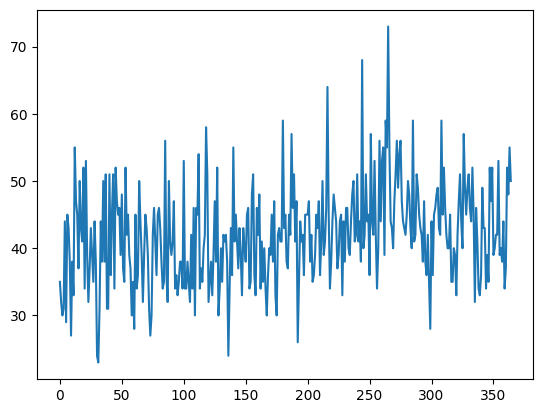

In [17]:
Dataviz_df['births'].plot()

In [19]:
Dataviz_df.index = Dataviz_df['date']

<Axes: xlabel='date'>

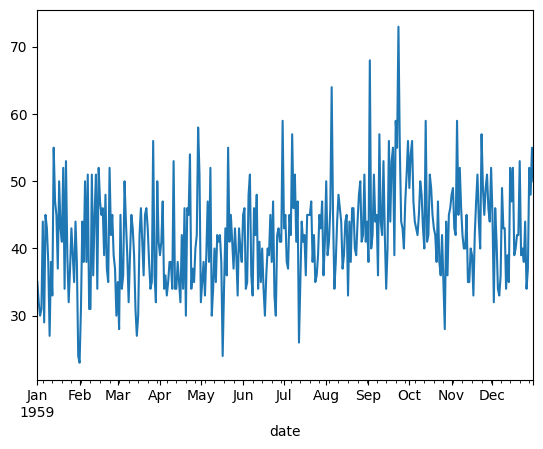

In [20]:
Dataviz_df['births'].plot()

<Axes: xlabel='date'>

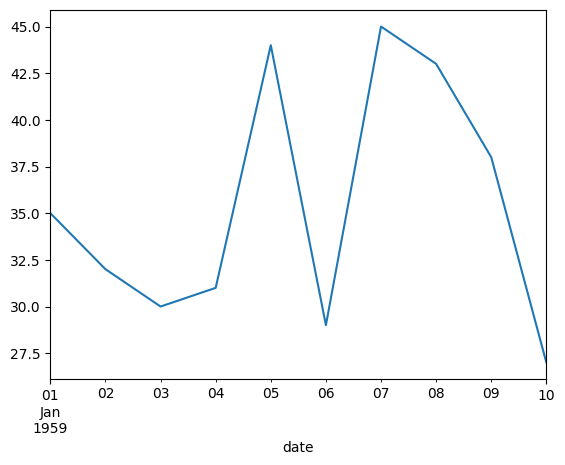

In [21]:
#  Zooming in 
Dataviz_df2 = Dataviz_df[(Dataviz_df['date']>='1959-01-01') & (Dataviz_df['date']<='1959-01-10')]
Dataviz_df2['births'].plot()

<Axes: ylabel='births'>

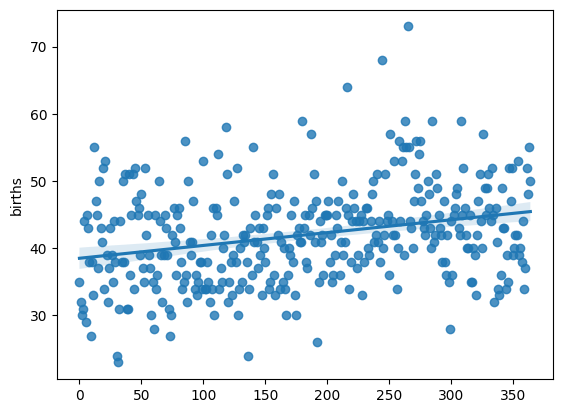

In [23]:
# Trend line
import seaborn as sns
# linear trend line 
sns.regplot(x=df2.index.values, y=df2['births'])

<Axes: ylabel='births'>

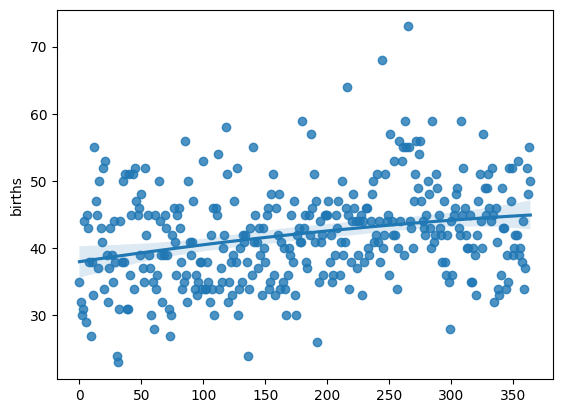

In [24]:
# polynomial trend line
sns.regplot(x=df2.index.values, y=df2['births'], order=2)

In [26]:
miles = pd.read_csv('./us-airlines-monthly-aircraft-miles-flown.csv', header=0, parse_dates=[0])
miles.head

<bound method NDFrame.head of         Month  MilesMM
0  1963-01-01     6827
1  1963-02-01     6178
2  1963-03-01     7084
3  1963-04-01     8162
4  1963-05-01     8462
..        ...      ...
91 1970-08-01    14057
92 1970-09-01    16234
93 1970-10-01    12389
94 1970-11-01    11595
95 1970-12-01    12772

[96 rows x 2 columns]>

<Axes: xlabel='year'>

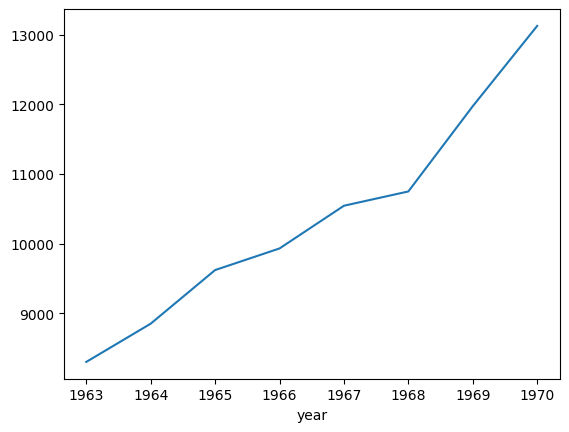

In [28]:
# removing seasonality in data 
miles['year'] = miles['Month'].dt.year
miles.groupby('year')['MilesMM'].mean().plot()
 

In [29]:
# creating lag plots 
miles['lag1'] = miles['MilesMM'].shift(1)
miles.head()

,Month,MilesMM,year,lag1
0,1963-01-01,6827,1963,NaN
1,1963-02-01,6178,1963,6827.0
2,1963-03-01,7084,1963,6178.0
3,1963-04-01,8162,1963,7084.0
4,1963-05-01,8462,1963,8162.0


<Axes: xlabel='lag1', ylabel='MilesMM'>

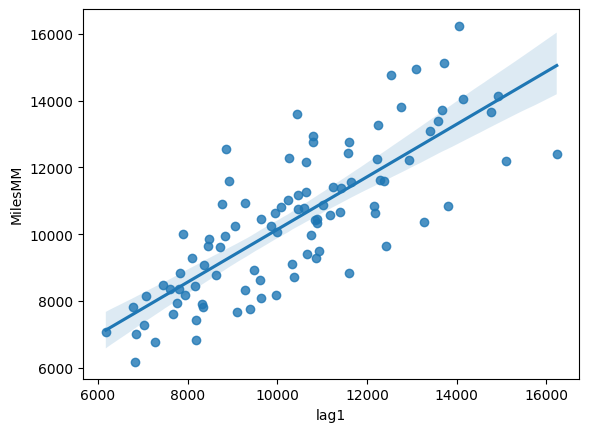

In [30]:
sns.regplot(x=miles['lag1'], y=miles['MilesMM'])

<Axes: xlabel='y(t)', ylabel='y(t + 1)'>

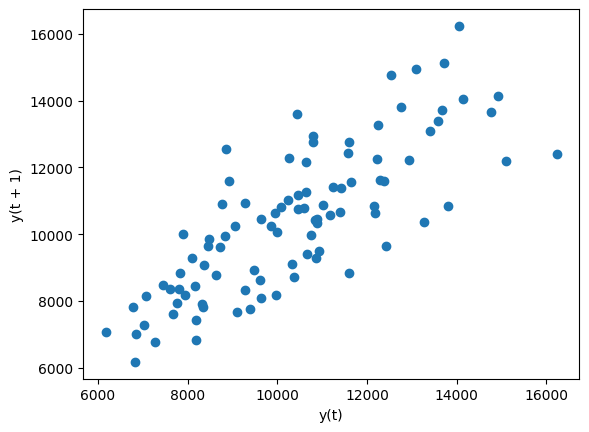

In [31]:
from pandas.plotting import lag_plot
lag_plot(miles['MilesMM'])

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

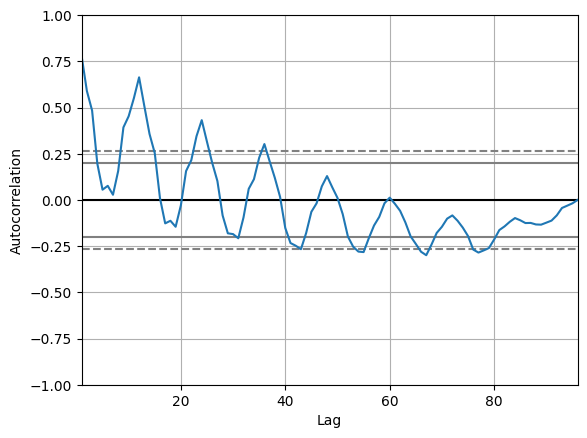

In [33]:
# auto correlation plot
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(miles['MilesMM'])

### Feature engineering

In [34]:
df2.head()

,date,births
0,1959-01-01,35
1,1959-01-02,32
2,1959-01-03,30
3,1959-01-04,31
4,1959-01-05,44


In [35]:
features = df2.copy()

In [36]:
features['year'] = features['date'].dt.year
features['month'] = features['date'].dt.month
features['day'] = features['date'].dt.day   
features.head()

,date,births,year,month,day
0,1959-01-01,35,1959,1,1
1,1959-01-02,32,1959,1,2
2,1959-01-03,30,1959,1,3
3,1959-01-04,31,1959,1,4
4,1959-01-05,44,1959,1,5


In [37]:
# lag features 
features['lag1'] = features['births'].shift(1)
features['lag2'] = features['births'].shift(2)
features.head()

,date,births,year,month,day,lag1,lag2
0,1959-01-01,35,1959,1,1,NaN,NaN
1,1959-01-02,32,1959,1,2,35.0,NaN
2,1959-01-03,30,1959,1,3,32.0,35.0
3,1959-01-04,31,1959,1,4,30.0,32.0
4,1959-01-05,44,1959,1,5,31.0,30.0


In [38]:
# window features 
features['rolling_mean'] = features['births'].rolling(window=2).mean()
features['rolling_max'] = features['births'].rolling(window=2).max()
features.head()

,date,births,year,month,day,lag1,lag2,rolling_mean,rolling_max
0,1959-01-01,35,1959,1,1,NaN,NaN,NaN,NaN
1,1959-01-02,32,1959,1,2,35.0,NaN,33.5,35.0
2,1959-01-03,30,1959,1,3,32.0,35.0,31.0,32.0
3,1959-01-04,31,1959,1,4,30.0,32.0,30.5,31.0
4,1959-01-05,44,1959,1,5,31.0,30.0,37.5,44.0


In [39]:
# down sampling and up sampling
miles_df = pd.read_csv('./us-airlines-monthly-aircraft-miles-flown.csv', header=0, parse_dates=[0])

In [46]:
# down sampling 
quaterly_miles = miles_df.resample('Q', on='Month').mean()
quaterly_miles.head()

,MilesMM
Month,
1963-03-31,6696.333333
1963-06-30,8756.000000
1963-09-30,10392.333333
1963-12-31,7356.333333
1964-03-31,7287.666667


In [47]:
yearly_miles = miles_df.resample('A', on='Month').sum()
yearly_miles.head()

,MilesMM
Month,
1963-12-31,99603
1964-12-31,106192
1965-12-31,115431
1966-12-31,119154
1967-12-31,126515


In [48]:
# up sampling
upsampled = miles_df.resample('D', on = 'Month').mean()
upsampled.head()

,MilesMM
Month,
1963-01-01,6827.0
1963-01-02,NaN
1963-01-03,NaN
1963-01-04,NaN
1963-01-05,NaN


In [49]:
interpolated = upsampled.interpolate(method='linear')
interpolated.head()

,MilesMM
Month,
1963-01-01,6827.000000
1963-01-02,6806.064516
1963-01-03,6785.129032
1963-01-04,6764.193548
1963-01-05,6743.258065
